In [78]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE  # Optional for oversampling
from sklearn.impute import SimpleImputer

# I. Read dataset

In [79]:
df=pd.read_csv('00_raw_dataset.csv', delimiter=';')
df.head()

,Opp- opp_stage,Amount- DE,Amount- HD,Amount- ID,Amount- OTHER,Amount- PP,Amount- PS,Amount- SP,SR- codigo,SR- status,SR- delta expected-completed,SR- resolutiontime,Acc- cl1,Acc- MarketSegment,Acc- bu,Acc- country,Acc- cap profile,Acc- coverage model
0,6 - Negotiate & Win,0.0,0.0,3238.38,0.0,0.0,0.0,0.0,SR-3463984,Completed,-7.0,8.9,End User,E38,Energy Management,PT,MA3,Sales Rep
1,6 - Negotiate & Win,0.0,0.0,3238.38,0.0,0.0,0.0,0.0,SR-3546478,Completed,3.0,2.2,End User,E38,Energy Management,PT,MA3,Sales Rep
2,7 - Deliver & Validate,0.0,0.0,907.50,0.0,0.0,0.0,0.0,SR-3544949,Completed,0.0,0.0,End User,E38,Energy Management,PT,MA3,Sales Rep
3,7 - Deliver & Validate,0.0,0.0,907.50,0.0,0.0,0.0,0.0,SR-3527614,Completed,-12.0,13.8,End User,E38,Energy Management,PT,MA3,Sales Rep
4,7 - Deliver & Validate,0.0,0.0,907.50,0.0,0.0,0.0,0.0,SR-3315312,Completed,-2.0,21.1,End User,E38,Energy Management,PT,MA3,Sales Rep


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52591 entries, 0 to 52590
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Opp- opp_stage                52574 non-null  object 
 1   Amount- DE                    52591 non-null  float64
 2   Amount- HD                    52591 non-null  float64
 3   Amount- ID                    52591 non-null  float64
 4   Amount- OTHER                 52591 non-null  float64
 5   Amount- PP                    52591 non-null  float64
 6   Amount- PS                    52591 non-null  float64
 7   Amount- SP                    52591 non-null  float64
 8   SR- codigo                    52591 non-null  object 
 9   SR- status                    52587 non-null  object 
 10  SR- delta expected-completed  47662 non-null  float64
 11  SR- resolutiontime            52591 non-null  float64
 12  Acc- cl1                      51919 non-null  object 
 13  A

# II. Cleaning / Feature engineering

## 1. Duplicates

### Analysis

In [80]:
# Dataframe shape incl. duplicates
print('Dataframe shape:')
print(df.shape)

# Identify duplicated rows based on all columns
duplicatedrows = df[df.duplicated()]
print('Duplicated rows shape:')
print(duplicatedrows.shape)
print("Duplicated rows except first occurrence based on all columns:")
duplicatedrows

Dataframe shape:
(52591, 18)
Duplicated rows shape:
(30961, 18)
Duplicated rows except first occurrence based on all columns:


,Opp- opp_stage,Amount- DE,Amount- HD,Amount- ID,Amount- OTHER,Amount- PP,Amount- PS,Amount- SP,SR- codigo,SR- status,SR- delta expected-completed,SR- resolutiontime,Acc- cl1,Acc- MarketSegment,Acc- bu,Acc- country,Acc- cap profile,Acc- coverage model
52,7 - Deliver & Validate,600.0,0.0,0.000,0.0,0.0,0.0,0.0,SR-3080636,Completed,0.0,0.2,End User,BD1,Digital Energy,ES,MS1,Sales Rep
53,7 - Deliver & Validate,600.0,0.0,0.000,0.0,0.0,0.0,0.0,SR-3080636,Completed,0.0,0.2,End User,BD1,Digital Energy,ES,MS1,Sales Rep
54,7 - Deliver & Validate,600.0,0.0,0.000,0.0,0.0,0.0,0.0,SR-3080636,Completed,0.0,0.2,End User,BD1,Digital Energy,ES,MS1,Sales Rep
56,2 - Define Opportunity Portfolio,480.0,0.0,0.000,0.0,0.0,0.0,0.0,SR-3439538,Completed,1.0,0.0,End User,BD1,Digital Energy,ES,MS1,Sales Rep
57,2 - Define Opportunity Portfolio,480.0,0.0,0.000,0.0,0.0,0.0,0.0,SR-3439538,Completed,1.0,0.0,End User,BD1,Digital Energy,ES,MS1,Sales Rep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52575,7 - Deliver & Validate,0.0,0.0,7143.603,0.0,0.0,0.0,0.0,SR-3241313,Completed,5.0,2.1,Contractor,ID2,INDUSTRIAL AUTOMATION,ES,MS3,Sales Rep
52576,7 - Deliver & Validate,0.0,0.0,7143.603,0.0,0.0,0.0,0.0,SR-3241313,Completed,5.0,2.1,Contractor,ID2,INDUSTRIAL AUTOMATION,ES,MS3,Sales Rep
52582,0 - Closed,0.0,0.0,3246.768,0.0,0.0,0.0,0.0,SR-2791067,Completed,2.0,5.1,Original Equipment Manufacturer,I37,INDUSTRIAL AUTOMATION,ES,MA3,Sales Rep
52583,0 - Closed,0.0,0.0,3246.768,0.0,0.0,0.0,0.0,SR-2791067,Completed,2.0,5.1,Original Equipment Manufacturer,I37,INDUSTRIAL AUTOMATION,ES,MA3,Sales Rep


### Clean duplicates

In [81]:
# Drop duplicates if all columns have the same value, keep first row.
df_cleaned = df.drop_duplicates(keep='first')

# Shape of dataset with duplicates
print('Dataframe shape before droping duplicates:')
print(df.shape)

# Shape of dataset without duplicates
print('Dataframe shape after droping duplicates:')
print(df_cleaned.shape)

Dataframe shape before droping duplicates:
(52591, 18)
Dataframe shape after droping duplicates:
(21630, 18)


## 2. Misssing data

### Analysis

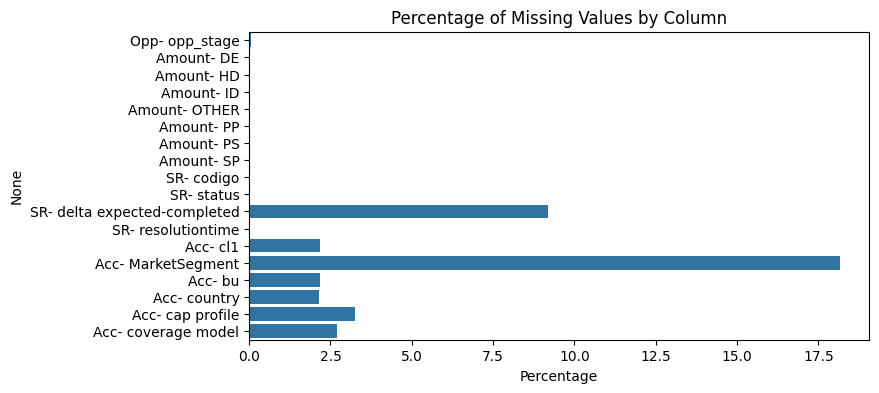


Missing Values Analysis:
                               Missing Values  Percentage
Opp- opp_stage                            11    0.050855
Amount- DE                                 0    0.000000
Amount- HD                                 0    0.000000
Amount- ID                                 0    0.000000
Amount- OTHER                              0    0.000000
Amount- PP                                 0    0.000000
Amount- PS                                 0    0.000000
Amount- SP                                 0    0.000000
SR- codigo                                 0    0.000000
SR- status                                 1    0.004623
SR- delta expected-completed            1989    9.195562
SR- resolutiontime                         0    0.000000
Acc- cl1                                 471    2.177531
Acc- MarketSegment                      3927   18.155340
Acc- bu                                  471    2.177531
Acc- country                             466    2.154415
Acc-

In [82]:
#Analyze missing data

def analyze_missing_data(df: pd.DataFrame) -> pd.DataFrame:
    """Analyze missing values in the dataset"""
   
    # Calculate missing values
    missing_values = df.isnull().sum()
    missing_percentages = (missing_values / len(df)) * 100

    missing_info = pd.DataFrame(
        {"Missing Values": missing_values, "Percentage": missing_percentages}
    )

    # Visualize missing values
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Percentage', y=missing_info.index, data=missing_info)
    plt.xticks(rotation=0)
    plt.title("Percentage of Missing Values by Column")
    plt.show()

    return missing_info

missing_info = analyze_missing_data(df_cleaned)
print("\nMissing Values Analysis:\n", missing_info)

In [83]:
missing_values = df_cleaned[df_cleaned.isnull().any(axis=1)]
missing_values

,Opp- opp_stage,Amount- DE,Amount- HD,Amount- ID,Amount- OTHER,Amount- PP,Amount- PS,Amount- SP,SR- codigo,SR- status,SR- delta expected-completed,SR- resolutiontime,Acc- cl1,Acc- MarketSegment,Acc- bu,Acc- country,Acc- cap profile,Acc- coverage model
32,3 - Identify & Qualify,0.000,0.0,0.00,0.0,0.3,0.00,0.0,SR-3597033,Submitted,NaN,0.0,End User,ID2,Secure Power,PT,MA2,Sales Rep
43,6 - Negotiate & Win,0.000,0.0,3114.84,0.0,0.0,0.00,0.0,SR-3597005,Submitted,NaN,0.0,End User,ID2,INDUSTRIAL AUTOMATION,PT,MA2,Sales Rep
49,4 - Influence & Develop,176360.277,0.0,0.00,0.0,0.0,525920.85,0.0,SR-3161687,Completed,-9.0,30.4,Contractor,NaN,Energy Management,ES,MS3,Sales Rep
50,4 - Influence & Develop,176360.277,0.0,0.00,0.0,0.0,525920.85,0.0,SR-3032698,Completed,2.0,14.1,Contractor,NaN,Energy Management,ES,MS3,Sales Rep
59,4 - Influence & Develop,33289.500,0.0,0.00,0.0,0.0,0.00,0.0,SR-3253877,Completed,3.0,7.8,Contractor,NaN,Power Products,ES,MA2,Sales Rep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52549,3 - Identify & Qualify,0.000,0.0,3000.00,0.0,0.0,0.00,0.0,SR-3452132,Rejected,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
52553,7 - Deliver & Validate,0.000,0.0,0.00,0.0,2006.1,0.00,0.0,SR-3028449,Completed,-5.0,12.1,NaN,NaN,NaN,NaN,NaN,NaN
52555,7 - Deliver & Validate,0.000,0.0,0.00,0.0,2006.1,0.00,0.0,SR-2985890,Completed,-10.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
52577,0 - Closed,0.000,0.0,213277.20,0.0,15000.0,150000.00,0.0,SR-3149021,Rejected,NaN,0.0,Contractor,E34,INDUSTRIAL AUTOMATION,ES,MS3,Sales Rep


In [84]:
# Filter rows where 'Opp- opp_stage' is null
missing_values_opp_stage = df_cleaned[df_cleaned['Opp- opp_stage'].isnull()]

# Display the filtered rows
missing_values_opp_stage

,Opp- opp_stage,Amount- DE,Amount- HD,Amount- ID,Amount- OTHER,Amount- PP,Amount- PS,Amount- SP,SR- codigo,SR- status,SR- delta expected-completed,SR- resolutiontime,Acc- cl1,Acc- MarketSegment,Acc- bu,Acc- country,Acc- cap profile,Acc- coverage model
50730,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SR-2674771,Completed,-1.0,10.8,NaN,NaN,NaN,NaN,NaN,NaN
50732,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SR-2655341,Completed,-7.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
50734,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SR-2947678,Rejected,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
50736,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SR-2825185,Completed,7.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
50738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SR-2667978,Completed,-52.0,59.3,NaN,NaN,NaN,NaN,NaN,NaN
50740,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SR-3058903,Completed,3.0,10.9,NaN,NaN,NaN,NaN,NaN,NaN
50742,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SR-2947699,Completed,0.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN
50743,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SR-3212953,Completed,-8.0,27.1,NaN,NaN,NaN,NaN,NaN,NaN
50744,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SR-2722048,Completed,1.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN
50745,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SR-3058898,Completed,0.0,6.9,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# Filter rows where 'SR- status' is null
missing_values_SR_status = df_cleaned[df_cleaned['SR- status'].isnull()]

# Display the filtered rows
missing_values_SR_status

,Opp- opp_stage,Amount- DE,Amount- HD,Amount- ID,Amount- OTHER,Amount- PP,Amount- PS,Amount- SP,SR- codigo,SR- status,SR- delta expected-completed,SR- resolutiontime,Acc- cl1,Acc- MarketSegment,Acc- bu,Acc- country,Acc- cap profile,Acc- coverage model
8720,0 - Closed,300.0,0.0,0.0,0.0,0.0,0.0,0.0,SR-3395102,NaN,NaN,0.0,End User,IT3,Digital Energy,ES,Not Completed,Sales Rep


In [85]:
# Filter rows where 'SR- delta expected-completed' is null
missing_values_SR_delta = df_cleaned[df_cleaned['SR- delta expected-completed'].isnull()]

# Display the filtered rows
missing_values_SR_delta

,Opp- opp_stage,Amount- DE,Amount- HD,Amount- ID,Amount- OTHER,Amount- PP,Amount- PS,Amount- SP,SR- codigo,SR- status,SR- delta expected-completed,SR- resolutiontime,Acc- cl1,Acc- MarketSegment,Acc- bu,Acc- country,Acc- cap profile,Acc- coverage model
32,3 - Identify & Qualify,0.0,0.0,0.00,0.0,0.3,0.0,0.000,SR-3597033,Submitted,NaN,0.0,End User,ID2,Secure Power,PT,MA2,Sales Rep
43,6 - Negotiate & Win,0.0,0.0,3114.84,0.0,0.0,0.0,0.000,SR-3597005,Submitted,NaN,0.0,End User,ID2,INDUSTRIAL AUTOMATION,PT,MA2,Sales Rep
132,7 - Deliver & Validate,0.0,0.0,0.00,0.0,0.0,0.0,5258.982,SR-2844369,Rejected,NaN,0.0,End User,B91,Power Products,ES,MS2,Sales Rep
276,7 - Deliver & Validate,0.0,0.0,0.00,0.0,0.0,900.0,0.000,SR-3275532,Rejected,NaN,0.0,End User,E37,INDUSTRIAL AUTOMATION,ES,MS3,Sales Rep
321,0 - Closed,0.0,0.0,0.00,0.0,0.0,1500.0,0.000,SR-2880205,Rejected,NaN,0.0,Contractor,E04,Power Systems,ES,MA1,Sales Rep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52540,0 - Closed,0.0,0.0,0.00,0.0,0.0,15000.0,0.000,SR-3096689,Rejected,NaN,0.0,Contractor,ID3,Power Systems,ES,MA2,Sales Rep
52541,0 - Closed,0.0,0.0,0.00,0.0,0.0,75000.0,0.000,SR-3096708,Rejected,NaN,0.0,Contractor,ID3,Power Systems,ES,MA2,Sales Rep
52542,3 - Identify & Qualify,0.0,0.0,0.00,0.0,0.0,60000.0,0.000,SR-3583069,Accepted - On Hold Front-Office,NaN,0.0,Contractor,I20,INDUSTRIAL AUTOMATION,ES,MG3,Sales Rep
52549,3 - Identify & Qualify,0.0,0.0,3000.00,0.0,0.0,0.0,0.000,SR-3452132,Rejected,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# Filter rows where 'SR- delta expected-completed' is 0 - only for comparison
SR_delta_zero = df_cleaned[df_cleaned['SR- delta expected-completed'] == 0]

SR_delta_zero

,Opp- opp_stage,Amount- DE,Amount- HD,Amount- ID,Amount- OTHER,Amount- PP,Amount- PS,Amount- SP,SR- codigo,SR- status,SR- delta expected-completed,SR- resolutiontime,Acc- cl1,Acc- MarketSegment,Acc- bu,Acc- country,Acc- cap profile,Acc- coverage model
2,7 - Deliver & Validate,0.0,0.0,907.5,0.0,0.000,0.0,0.0,SR-3544949,Completed,0.0,0.0,End User,E38,Energy Management,PT,MA3,Sales Rep
6,7 - Deliver & Validate,0.0,0.0,190.8,0.0,0.000,0.0,0.0,SR-3479003,Completed,0.0,7.8,End User,E38,Energy Management,PT,MA3,Sales Rep
7,6 - Negotiate & Win,261.0,0.0,0.0,0.0,230.196,0.0,0.0,SR-3545075,Completed,0.0,0.0,End User,E38,Energy Management,PT,MA3,Sales Rep
11,7 - Deliver & Validate,0.0,0.0,0.0,0.0,1981.845,0.0,0.0,SR-2674200,Completed,0.0,4.4,End User,E38,Energy Management,PT,MA3,Sales Rep
12,7 - Deliver & Validate,0.0,0.0,0.0,0.0,1981.845,0.0,0.0,SR-2674194,Completed,0.0,3.2,End User,E38,Energy Management,PT,MA3,Sales Rep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,0 - Closed,0.0,0.0,213277.2,0.0,15000.000,150000.0,0.0,SR-3124721,Completed,0.0,43.1,Contractor,E34,INDUSTRIAL AUTOMATION,ES,MS3,Sales Rep
52580,6 - Negotiate & Win,2055.0,0.0,0.0,0.0,0.000,0.0,0.0,SR-2800776,Completed,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
52588,7 - Deliver & Validate,70200.0,0.0,0.0,0.0,0.000,0.0,0.0,SR-2886627,Completed,0.0,6.9,Contractor,BDZ,Power Products,ES,MA3,Sales Rep
52589,4 - Influence & Develop,146700.0,0.0,0.0,0.0,0.000,0.0,0.0,SR-2740198,Completed,0.0,8.1,Contractor,BDZ,Power Products,ES,MA3,Sales Rep


### Criteria for cleaning

* Opp- opp_stage                            11    0.050855
    -> DROP rows
    -  Reason: Null values in rest of columns.
* SR- status                                 1    0.004623
    -> DROP rows
    - Reason: Only 1 case and there is no certainty that if Opp status = 0-Closed, SR- status = Completed.
* SR- delta expected-completed            1989    9.195562
    -> DROP column 'SR- delta expected-completed'
    - Reason: As mentors suggested, this column does not provide relevant information for the ML model
    - An alternative would be to substitute the null values to 0 if Resolution time = 0, because all Null values in delta column has Resolution time = 0. However, not all resolution time = 0 has delta 0; some have delta -1. Therefore our assumption may be inconsistent.

*   Acc- cap profile and Acc- coverage model:                         
    -> Convert 'Not Completed' to NaN, see below step

* Substitute NaN to 'Not informed':
    Acc- cl1                                 471    2.177531
    Acc- MarketSegment                      3927   18.155340
    Acc- bu                                  471    2.177531
    Acc- cap profile                         704    3.254739
    Acc- country                             466    2.154415
    Acc- coverage model                      582    2.690707   
    
    - Reason: Best solution possible due to imbalance. We tried substituting the null values using imputation with KNN, Decision Tree and Random Forest, however the missing data features are highly imbalanced, and as result these methods cannot fill the missing values with sufficient confidence (we only accept 80% of confidence or more).

### Clean missing data

In [87]:

# Drop rows where 'opp_stage' is null
df_cleaned = df_cleaned.dropna(subset=['Opp- opp_stage'])

# Drop row where 'SR- status' is null
df_cleaned = df_cleaned.dropna(subset=['Opp- opp_stage','SR- status'])

# Drop column 'SR- delta expected-completed'
df_cleaned = df_cleaned.drop(['SR- delta expected-completed'], axis=1)

# Replace "Not informed" with NaN 'Acc- cap profile'
df_cleaned['Acc- cap profile'] = df_cleaned['Acc- cap profile'].replace("Not Completed", np.nan)

# Replace "Not informed" with NaN 'Acc- coverage model'
df_cleaned['Acc- coverage model'] = df_cleaned['Acc- coverage model'].replace("Not informed", np.nan)

#Replace null values in rest of columns (Acc) with 'Not informed'
# List of columns to update
columns_to_update = [
    "Acc- cl1", 
    "Acc- MarketSegment", 
    "Acc- bu", 
    "Acc- cap profile",
    "Acc- country",
    "Acc- coverage model"
]
# Replace null values with 'Not informed' in the specified columns
df_cleaned[columns_to_update] = df_cleaned[columns_to_update].fillna("Not informed")

print('Dataframe shape after cleaning missing data:')
print(df_cleaned.shape)

df_cleaned.head()

Dataframe shape after cleaning missing data:
(21618, 17)


,Opp- opp_stage,Amount- DE,Amount- HD,Amount- ID,Amount- OTHER,Amount- PP,Amount- PS,Amount- SP,SR- codigo,SR- status,SR- resolutiontime,Acc- cl1,Acc- MarketSegment,Acc- bu,Acc- country,Acc- cap profile,Acc- coverage model
0,6 - Negotiate & Win,0.0,0.0,3238.38,0.0,0.0,0.0,0.0,SR-3463984,Completed,8.9,End User,E38,Energy Management,PT,MA3,Sales Rep
1,6 - Negotiate & Win,0.0,0.0,3238.38,0.0,0.0,0.0,0.0,SR-3546478,Completed,2.2,End User,E38,Energy Management,PT,MA3,Sales Rep
2,7 - Deliver & Validate,0.0,0.0,907.50,0.0,0.0,0.0,0.0,SR-3544949,Completed,0.0,End User,E38,Energy Management,PT,MA3,Sales Rep
3,7 - Deliver & Validate,0.0,0.0,907.50,0.0,0.0,0.0,0.0,SR-3527614,Completed,13.8,End User,E38,Energy Management,PT,MA3,Sales Rep
4,7 - Deliver & Validate,0.0,0.0,907.50,0.0,0.0,0.0,0.0,SR-3315312,Completed,21.1,End User,E38,Energy Management,PT,MA3,Sales Rep


#### Alternatives evaluated

##### KNN

In [ ]:
#KNN

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# Create a copy of the original DataFrame to avoid modifying it
df_cleaned0 = df_cleaned.copy()


# Columns to impute
columns_to_impute = [
    'Acc- cl1',
    'Acc- MarketSegment',
    'Acc- bu',
    'Acc- country',
    'Acc- cap profile',
    'Acc- coverage model'
]

# Replace "Not informed" with NaN for processing
df_cleaned0[columns_to_impute] = df_cleaned0[columns_to_impute].replace("Not informed", np.nan)

# Create a dictionary to store LabelEncoders for each column
encoders = {}

# Encode categorical variables for the imputation columns
for column in columns_to_impute:
    encoder = LabelEncoder()
    df_cleaned0[column] = encoder.fit_transform(df_cleaned0[column].astype(str))  # Convert categories to numbers
    encoders[column] = encoder

# Ensure that all other features are numeric or encoded
non_imputation_columns = [col for col in df_cleaned0.columns if col not in columns_to_impute]
for column in non_imputation_columns:
    if df_cleaned0[column].dtype == 'object':  # Encode non-numeric features
        encoder = LabelEncoder()
        df_cleaned0[column] = encoder.fit_transform(df_cleaned0[column].astype(str))

# Evaluate confidence for KNN imputation
for column in columns_to_impute:
    # Select rows without missing values for evaluation
    non_missing = df_cleaned0[df_cleaned0[column] != -1]
    
    # Skip if there are no non-missing values
    if non_missing.empty:
        print(f"No non-missing data available for '{column}'. Skipping confidence evaluation.")
        continue
    
    # Split the data: mask some known values as missing for validation
    X = non_missing.drop(columns=columns_to_impute)  # Features
    y = non_missing[column]  # Target column
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train KNN classifier
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    
    # Predict on the masked (test) set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Confidence level for '{column}' imputation: {accuracy:.2%}")

Confidence level for 'Acc- cl1' imputation: 47.85%
Confidence level for 'Acc- MarketSegment' imputation: 21.65%
Confidence level for 'Acc- bu' imputation: 35.25%
Confidence level for 'Acc- country' imputation: 76.76%
Confidence level for 'Acc- cap profile' imputation: 26.48%
Confidence level for 'Acc- coverage model' imputation: 75.16%


##### Decision tree

In [90]:
#DECISION TREE

# Create a copy of the original DataFrame to avoid modifying it
df_cleaned1 = df_cleaned.copy()


# List of columns to impute
columns_to_impute = [
    "Acc- cl1", 
    "Acc- MarketSegment", 
    "Acc- bu",
    "Acc- cap profile",
    "Acc- country",
    "Acc- coverage model"
]

# Create a dictionary to store LabelEncoders for each column
encoders = {}

# Encode categorical variables in columns to impute
for column in columns_to_impute:
    encoder = LabelEncoder()
    df_cleaned1[column] = encoder.fit_transform(df_cleaned1[column].astype(str))  # Convert categories to numbers
    encoders[column] = encoder

# Encode all string-based categorical columns in the feature set
feature_encoders = {}
categorical_columns = df_cleaned1.select_dtypes(include=["object"]).columns  # Select string columns
for column in categorical_columns:
    encoder = LabelEncoder()
    df_cleaned1[column] = encoder.fit_transform(df_cleaned1[column].astype(str))
    feature_encoders[column] = encoder

# Evaluate model performance on non-missing data
print("\n### Model Evaluation ###")
for column in columns_to_impute:
    # Split into rows with and without missing values
    not_missing = df_cleaned1[df_cleaned1[column].notna()]

    if not_missing.empty:  # Skip if no non-missing data
        print(f"No data for evaluation in column '{column}'. Skipping.")
        continue

    print(f"Evaluating column: {column}")

    # Define features (X) and target (y)
    X = not_missing.drop(columns=columns_to_impute)
    y = not_missing[column]

    # Split the non-missing rows into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Train a Decision Tree classifier
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model on the validation set
    y_pred = model.predict(X_val)

    # Ensure there are no issues with unique classes
    print(f"Unique classes in y_train: {np.unique(y_train)}")
    print(f"Unique classes in y_val: {np.unique(y_val)}")

    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy for column '{column}': {accuracy:.2f}")
    try:
        print(f"Classification Report for column '{column}':")
        print(classification_report(y_val, y_pred))
    except Exception as e:
        print(f"Error generating classification report for column '{column}': {e}")
    



### Model Evaluation ###
Evaluating column: Acc- cl1
Unique classes in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Unique classes in y_val: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Accuracy for column 'Acc- cl1': 0.47
Classification Report for column 'Acc- cl1':
              precision    recall  f1-score   support

           0       0.21      0.21      0.21       357
           1       0.53      0.50      0.51      1367
           2       0.33      0.50      0.40         4
           3       0.39      0.38      0.38       152
           4       0.23      0.27      0.25        67
           5       0.18      0.23      0.20       137
           6       0.59      0.58      0.59      1866
           7       0.21      0.21      0.21        39
           8       0.20      0.25      0.22         4
           9       0.30      0.33      0.32        94
          10       0.10      0.13      0.11        53
          11       0.25      0.28      0.27       110
          12       0.09    

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s

Unique classes in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Unique classes in y_val: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16]
Accuracy for column 'Acc- bu': 0.37
Classification Report for column 'Acc- bu':
              precision    recall  f1-score   support

           0       0.32      0.32      0.32       353
           1       0.43      0.50      0.46         6
           2       0.17      0.21      0.19        96
           3       0.12      0.15      0.13       143
           4       0.28      0.29      0.29       508
           6       0.80      0.67      0.73        12
           7       0.43      0.42      0.43       903
           8       0.38      0.43      0.40        94
           9       0.48      0.47      0.47      1165
          10       0.37      0.37      0.37       716
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         2
          13       0.17      0.12      0.14         8
        

**Analysis of performance of Decision Tree**

* Analysis of the Results: 
    Accuracy: Ranges from 27% to 77%, depending on the column.
        Some columns (e.g., Acc- cl1, Acc- MarketSegment, Acc- bu, Acc- cap profile) show very low accuracy (~27%-46%), indicating poor performance.
        Others (e.g., Acc- country and Acc- coverage model) have higher accuracy (~70%-77%), suggesting better performance.
    Class Imbalance:
        Many columns have a severe class imbalance, where a few classes dominate (e.g., Acc- coverage model has a large majority of instances in class 5).
        This imbalance impacts the performance of precision, recall, and f1-score for underrepresented classes.
    Macro vs. Weighted Averages:
        The macro average (average performance across all classes, unweighted) is much lower than the weighted average (accounts for class distribution).
        This further highlights the class imbalance issue.
    Undefined Metrics Warnings:
        Some classes are either not predicted at all or do not have true samples in the validation set, leading to precision, recall, and f1-score being undefined. This is particularly evident in underrepresented classes.


* Class Imbalance: Most columns have dominant classes that overshadow others.
    Underrepresented classes are often not predicted or poorly predicted, leading to low macro averages.
* High Cardinality: Columns like Acc- MarketSegment (128 classes) are difficult to model effectively due to high cardinality.
    Reducing the number of classes (e.g., grouping similar segments) may improve performance.
* Low Accuracy for Critical Columns: Columns like Acc- cl1, Acc- MarketSegment, and Acc- bu show poor performance, indicating the model is struggling.
* Undefined Metrics: Some classes have no true or predicted samples, resulting in undefined precision and recall. This issue needs to be addressed by balancing the dataset or restructuring the problem.

In [91]:
#DECISION TREE + Reducing high cardinality
# Create a copy of the original DataFrame to avoid modifying it
df_cleaned1 = df_cleaned.copy()

# List of columns to impute
columns_to_impute = [
    "Acc- cl1", 
    "Acc- MarketSegment", 
    "Acc- bu",
    "Acc- cap profile",
    "Acc- country",
    "Acc- coverage model"
]

# Reduce high cardinality by grouping infrequent classes
def reduce_high_cardinality(df, column, threshold=0.05):
    """Group infrequent classes in a column into an 'Other' category"""
    value_counts = df[column].value_counts(normalize=True)
    low_frequency_classes = value_counts[value_counts < threshold].index
    df[column] = df[column].apply(lambda x: "Other" if x in low_frequency_classes else x)
    return df

# Apply high cardinality reduction for specific columns
high_cardinality_columns = ["Acc- MarketSegment"]
for col in high_cardinality_columns:
    df_cleaned1 = reduce_high_cardinality(df_cleaned1, col, threshold=0.02)  # Adjust threshold as needed

# Create a dictionary to store LabelEncoders for each column
encoders = {}

# Encode categorical variables in columns to impute
for column in columns_to_impute:
    encoder = LabelEncoder()
    df_cleaned1[column] = encoder.fit_transform(df_cleaned1[column].astype(str))  # Convert categories to numbers
    encoders[column] = encoder

# Encode all string-based columns in the feature set
feature_encoders = {}
categorical_columns = df_cleaned1.select_dtypes(include=["object"]).columns  # Select string columns
for column in categorical_columns:
    encoder = LabelEncoder()
    df_cleaned1[column] = encoder.fit_transform(df_cleaned1[column].astype(str))
    feature_encoders[column] = encoder

# Evaluate model performance on non-missing data
print("\n### Model Evaluation ###")
for column in columns_to_impute:
    # Split into rows with and without missing values
    not_missing = df_cleaned1[df_cleaned1[column].notna()]

    if not_missing.empty:  # Skip if no non-missing data
        print(f"No data for evaluation in column '{column}'. Skipping.")
        continue

    print(f"Evaluating column: {column}")

    # Define features (X) and target (y)
    X = not_missing.drop(columns=columns_to_impute)
    y = not_missing[column]

    # Split the non-missing rows into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Train a Decision Tree classifier with balanced class weights
    model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
    model.fit(X_train, y_train)

    # Evaluate the model on the validation set
    y_pred = model.predict(X_val)

    # Ensure there are no issues with unique classes
    print(f"Unique classes in y_train: {np.unique(y_train)}")
    print(f"Unique classes in y_val: {np.unique(y_val)}")

    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy for column '{column}': {accuracy:.2f}")
    try:
        print(f"Classification Report for column '{column}':")
        print(classification_report(y_val, y_pred))
    except Exception as e:
        print(f"Error generating classification report for column '{column}': {e}")



### Model Evaluation ###
Evaluating column: Acc- cl1
Unique classes in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Unique classes in y_val: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Accuracy for column 'Acc- cl1': 0.47
Classification Report for column 'Acc- cl1':
              precision    recall  f1-score   support

           0       0.22      0.24      0.23       357
           1       0.50      0.50      0.50      1367
           2       0.17      0.25      0.20         4
           3       0.37      0.35      0.36       152
           4       0.16      0.18      0.17        67
           5       0.19      0.20      0.19       137
           6       0.60      0.57      0.59      1866
           7       0.19      0.26      0.22        39
           8       0.33      0.25      0.29         4
           9       0.35      0.35      0.35        94
          10       0.12      0.11      0.12        53
          11       0.29      0.32      0.30       110
          12       0.14    

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Unique classes in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique classes in y_val: [0 1 2 3 4 5 6 7 8 9]
Accuracy for column 'Acc- cap profile': 0.32
Classification Report for column 'Acc- cap profile':
              precision    recall  f1-score   support

           0       0.23      0.24      0.23       350
           1       0.29      0.31      0.30       376
           2       0.38      0.34      0.36       745
           3       0.15      0.15      0.15       110
           4       0.27      0.31      0.29       387
           5       0.41      0.38      0.39       813
           6       0.22      0.24      0.23       103
           7       0.25      0.26      0.25       356
           8       0.32      0.33      0.32       438
           9       0.38      0.38      0.38       646

    accuracy                           0.32      4324
   macro avg       0.29      0.29      0.29      4324
weighted avg       0.33      0.32      0.33      4324

Evaluating column: Acc- country
Unique classes 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

##### Random forest

In [92]:
#RANDOM FOREST adjusting cardinality 

# Create a copy of the original DataFrame to avoid modifying it
df_cleaned2 = df_cleaned.copy()

# List of columns to impute
columns_to_impute = [
    "Acc- cl1", 
    "Acc- MarketSegment", 
    "Acc- bu",
    "Acc- cap profile",
    "Acc- country",
    "Acc- coverage model"
]

# Reduce high cardinality by grouping infrequent classes
def reduce_high_cardinality(df, column, threshold=0.05):
    """Group infrequent classes in a column into an 'Other' category"""
    value_counts = df[column].value_counts(normalize=True)
    low_frequency_classes = value_counts[value_counts < threshold].index
    df[column] = df[column].apply(lambda x: "Other" if x in low_frequency_classes else x)
    return df

# Apply high cardinality reduction for specific columns
high_cardinality_columns = ["Acc- MarketSegment"]
for col in high_cardinality_columns:
    df_cleaned2 = reduce_high_cardinality(df_cleaned2, col, threshold=0.02)

# Create a dictionary to store LabelEncoders for each column
encoders = {}

# Encode categorical variables in columns to impute
for column in columns_to_impute:
    encoder = LabelEncoder()
    df_cleaned2[column] = encoder.fit_transform(df_cleaned2[column].astype(str))  # Convert categories to numbers
    encoders[column] = encoder

# Encode all string-based columns in the feature set
feature_encoders = {}
categorical_columns = df_cleaned2.select_dtypes(include=["object"]).columns
for column in categorical_columns:
    encoder = LabelEncoder()
    df_cleaned2[column] = encoder.fit_transform(df_cleaned2[column].astype(str))
    feature_encoders[column] = encoder

# Evaluate model performance on non-missing data
print("\n### Model Evaluation ###")
for column in columns_to_impute:
    # Split into rows with and without missing values
    not_missing = df_cleaned2[df_cleaned2[column].notna()]

    if not_missing.empty:  # Skip if no non-missing data
        print(f"No data for evaluation in column '{column}'. Skipping.")
        continue

    print(f"Evaluating column: {column}")

    # Define features (X) and target (y)
    X = not_missing.drop(columns=columns_to_impute)
    y = not_missing[column]

    # Split the non-missing rows into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Impute missing values in X_train
    imputer = SimpleImputer(strategy="mean")
    X_train_imputed = imputer.fit_transform(X_train)
    X_val_imputed = imputer.transform(X_val)

    # Handle oversampling for imbalanced classes
    try:
        # Try SMOTE with reduced neighbors
        smote = SMOTE(random_state=42, k_neighbors=1)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train_imputed, y_train)
        print(f"SMOTE applied successfully for column '{column}'.")
    except ValueError as e:
        # Fallback to Random Oversampling
        print(f"SMOTE failed for column '{column}' with error: {e}. Applying Random Oversampling.")
        ros = RandomOverSampler(random_state=42)
        X_train_balanced, y_train_balanced = ros.fit_resample(X_train_imputed, y_train)

    # Train a Random Forest classifier
    model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100, max_depth=10)
    model.fit(X_train_balanced, y_train_balanced)

    # Evaluate the model on the validation set
    y_pred = model.predict(X_val_imputed)

    # Ensure there are no issues with unique classes
    print(f"Unique classes in y_train_balanced: {np.unique(y_train_balanced)}")
    print(f"Unique classes in y_val: {np.unique(y_val)}")

    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy for column '{column}': {accuracy:.2f}")
    try:
        print(f"Classification Report for column '{column}':")
        print(classification_report(y_val, y_pred))
    except Exception as e:
        print(f"Error generating classification report for column '{column}': {e}")



### Model Evaluation ###
Evaluating column: Acc- cl1
SMOTE applied successfully for column 'Acc- cl1'.
Unique classes in y_train_balanced: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Unique classes in y_val: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Accuracy for column 'Acc- cl1': 0.27
Classification Report for column 'Acc- cl1':
              precision    recall  f1-score   support

           0       0.20      0.22      0.21       357
           1       0.64      0.26      0.37      1367
           2       0.01      0.25      0.01         4
           3       0.28      0.38      0.32       152
           4       0.05      0.34      0.08        67
           5       0.15      0.09      0.12       137
           6       0.59      0.27      0.37      1866
           7       0.09      0.31      0.14        39
           8       0.00      0.25      0.00         4
           9       0.18      0.50      0.27        94
          10       0.04      0.26      0.07        53
          11       0.1

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Unique classes in y_train_balanced: [0 1 2 3 4 5 6]
Unique classes in y_val: [0 1 2 3 4 5 6]
Accuracy for column 'Acc- coverage model': 0.55
Classification Report for column 'Acc- coverage model':
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.21      0.38      0.27       523
           2       0.18      0.26      0.21       280
           3       0.00      0.00      0.00         1
           4       0.13      0.50      0.20       113
           5       0.01      0.20      0.02         5
           6       0.84      0.60      0.70      3400

    accuracy                           0.55      4324
   macro avg       0.34      0.42      0.34      4324
weighted avg       0.70      0.55      0.60      4324



**Analysis RANDOM FOREST after adjusting cardinality**
Accuracy:
    Accuracy scores are generally low across most columns, except for Acc- country (71%) and Acc- coverage model (57%). These two columns likely have a more balanced class distribution or more meaningful features to distinguish between classes.
    Other columns have accuracies below 30%, reflecting the model's struggle with imbalanced and high-dimensional data.
Class Imbalance:
    SMOTE effectively balanced the training data, but poor recall and precision on minority classes in the validation set indicate that oversampling alone is insufficient to address imbalance.
    The validation data remains imbalanced, causing issues with generalization.
Class-Specific Performance:
    Majority Classes: The model performs better on majority classes (e.g., class 5 in Acc- coverage model, class 1 in Acc- country).
    Minority Classes: Precision and recall are low for minority classes, and some classes (e.g., Acc- MarketSegment class 3, Acc- coverage model class 3) are not predicted at all.
    Weighted vs. Macro Averages:

Weighted averages are dominated by majority classes, masking poor performance on minority classes.
Macro averages reflect poor overall performance across all classes, with low precision and recall.


#### Cleaned dataframe (missings)

In [93]:
print('Dataframe shape after cleaning missing data:')
print(df_cleaned.shape)

df_cleaned.head()

Dataframe shape after cleaning missing data:
(21618, 17)


,Opp- opp_stage,Amount- DE,Amount- HD,Amount- ID,Amount- OTHER,Amount- PP,Amount- PS,Amount- SP,SR- codigo,SR- status,SR- resolutiontime,Acc- cl1,Acc- MarketSegment,Acc- bu,Acc- country,Acc- cap profile,Acc- coverage model
0,6 - Negotiate & Win,0.0,0.0,3238.38,0.0,0.0,0.0,0.0,SR-3463984,Completed,8.9,End User,E38,Energy Management,PT,MA3,Sales Rep
1,6 - Negotiate & Win,0.0,0.0,3238.38,0.0,0.0,0.0,0.0,SR-3546478,Completed,2.2,End User,E38,Energy Management,PT,MA3,Sales Rep
2,7 - Deliver & Validate,0.0,0.0,907.50,0.0,0.0,0.0,0.0,SR-3544949,Completed,0.0,End User,E38,Energy Management,PT,MA3,Sales Rep
3,7 - Deliver & Validate,0.0,0.0,907.50,0.0,0.0,0.0,0.0,SR-3527614,Completed,13.8,End User,E38,Energy Management,PT,MA3,Sales Rep
4,7 - Deliver & Validate,0.0,0.0,907.50,0.0,0.0,0.0,0.0,SR-3315312,Completed,21.1,End User,E38,Energy Management,PT,MA3,Sales Rep


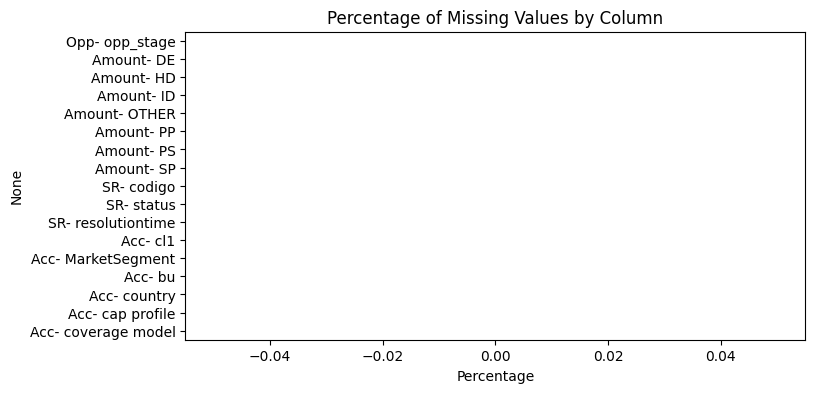


Missing Values Analysis:
                      Missing Values  Percentage
Opp- opp_stage                    0         0.0
Amount- DE                        0         0.0
Amount- HD                        0         0.0
Amount- ID                        0         0.0
Amount- OTHER                     0         0.0
Amount- PP                        0         0.0
Amount- PS                        0         0.0
Amount- SP                        0         0.0
SR- codigo                        0         0.0
SR- status                        0         0.0
SR- resolutiontime                0         0.0
Acc- cl1                          0         0.0
Acc- MarketSegment                0         0.0
Acc- bu                           0         0.0
Acc- country                      0         0.0
Acc- cap profile                  0         0.0
Acc- coverage model               0         0.0


In [94]:
missing_info = analyze_missing_data(df_cleaned)
print("\nMissing Values Analysis:\n", missing_info)

## 3. Grouping

### Total_Amount

In [95]:
# Sum all BU amount columns and create a new column: 'Total_Amount'
df_cleaned['Total_Amount'] = df_cleaned[['Amount- DE', 'Amount- HD', 'Amount- ID', 'Amount- OTHER', 'Amount- PP', 'Amount- PS', 'Amount- SP']].sum(axis=1)

# Insert the new column 'Total_Amount' after column 7 (index 7 in zero-based indexing)
df_cleaned.insert(8, 'Total_Amount', df_cleaned.pop('Total_Amount'))

df_cleaned
# print(df_cleaned.head())

,Opp- opp_stage,Amount- DE,Amount- HD,Amount- ID,Amount- OTHER,Amount- PP,Amount- PS,Amount- SP,Total_Amount,SR- codigo,SR- status,SR- resolutiontime,Acc- cl1,Acc- MarketSegment,Acc- bu,Acc- country,Acc- cap profile,Acc- coverage model
0,6 - Negotiate & Win,0.0,0.0,3238.38,0.0,0.0,0.0,0.0,3238.38,SR-3463984,Completed,8.9,End User,E38,Energy Management,PT,MA3,Sales Rep
1,6 - Negotiate & Win,0.0,0.0,3238.38,0.0,0.0,0.0,0.0,3238.38,SR-3546478,Completed,2.2,End User,E38,Energy Management,PT,MA3,Sales Rep
2,7 - Deliver & Validate,0.0,0.0,907.50,0.0,0.0,0.0,0.0,907.50,SR-3544949,Completed,0.0,End User,E38,Energy Management,PT,MA3,Sales Rep
3,7 - Deliver & Validate,0.0,0.0,907.50,0.0,0.0,0.0,0.0,907.50,SR-3527614,Completed,13.8,End User,E38,Energy Management,PT,MA3,Sales Rep
4,7 - Deliver & Validate,0.0,0.0,907.50,0.0,0.0,0.0,0.0,907.50,SR-3315312,Completed,21.1,End User,E38,Energy Management,PT,MA3,Sales Rep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52586,7 - Deliver & Validate,70200.0,0.0,0.00,0.0,0.0,0.0,0.0,70200.00,SR-2631856,Completed,22.3,Contractor,BDZ,Power Products,ES,MA3,Sales Rep
52587,7 - Deliver & Validate,70200.0,0.0,0.00,0.0,0.0,0.0,0.0,70200.00,SR-3131029,Completed,14.6,Contractor,BDZ,Power Products,ES,MA3,Sales Rep
52588,7 - Deliver & Validate,70200.0,0.0,0.00,0.0,0.0,0.0,0.0,70200.00,SR-2886627,Completed,6.9,Contractor,BDZ,Power Products,ES,MA3,Sales Rep
52589,4 - Influence & Develop,146700.0,0.0,0.00,0.0,0.0,0.0,0.0,146700.00,SR-2740198,Completed,8.1,Contractor,BDZ,Power Products,ES,MA3,Sales Rep


### SR-Status

In [96]:
# Display unique values in the column 'Acc- country'
unique_values_SR_status = df_cleaned['SR- status'].unique()
print("Unique values in 'SR- status':")
print(unique_values_SR_status)


Unique values in 'SR- status':
['Completed' 'Submitted' 'Rejected' 'Accepted - On Hold Front-Office'
 'Accepted - On Hold Back-Office' 'Accepted - In Progress'
 'Accepted - Scheduled']


In [97]:
# Mapping old values to new values
SR_status_mapping = {
    'Completed': 'Bid',
    'Submitted': 'Not_decided_yet',
    'Rejected': 'Not_bid',
    'Accepted - On Hold Front-Office': 'Bid',
    'Accepted - On Hold Back-Office': 'Bid',
    'Accepted - In Progress': 'Bid',
    'Accepted - Scheduled': 'Bid'
}

# Update column
df_cleaned['SR- status'] = df_cleaned['SR- status'].replace(SR_status_mapping)

# Display updated unique values in the column
unique_values_SR_status = df_cleaned['SR- status'].unique()
print("Updated - Unique values in 'SR- status':")
print(unique_values_SR_status)

Updated - Unique values in 'SR- status':
['Bid' 'Not_decided_yet' 'Not_bid']


### Opp- opp_stage homogeneization

In [98]:
# Display unique values in the column
unique_values_opp_stage = df_cleaned['Opp- opp_stage'].unique()
print("Unique values in 'Opp- opp_stage':")
print(unique_values_opp_stage)

Unique values in 'Opp- opp_stage':
['6 - Negotiate & Win' '7 - Deliver & Validate' '0 - Closed'
 '3 - Identify & Qualify' '4 - Influence & Develop'
 '2 - Define Opportunity Portfolio' '5 - Prepare & Bid']


In [99]:
# Mapping old values to new values
opp_stage_mapping = {
    '0 - Closed': 'Lost',
    '2 - Define Opportunity Portfolio': 'Pipeline',
    '3 - Identify & Qualify': 'Pipeline',
    '4 - Influence & Develop': 'Pipeline',
    '5 - Prepare & Bid': 'Pipeline',
    '6 - Negotiate & Win': 'Pipeline',
    '7 - Deliver & Validate': 'Won'
}

# Update column
df_cleaned['Opp- opp_stage'] = df_cleaned['Opp- opp_stage'].replace(opp_stage_mapping)

# Display updated unique values in the column
unique_values_opp_stage = df_cleaned['Opp- opp_stage'].unique()
print("Updated - Unique values in 'Opp- opp_stage':")
print(unique_values_opp_stage)

Updated - Unique values in 'Opp- opp_stage':
['Pipeline' 'Won' 'Lost']


In [100]:
df_cleaned

,Opp- opp_stage,Amount- DE,Amount- HD,Amount- ID,Amount- OTHER,Amount- PP,Amount- PS,Amount- SP,Total_Amount,SR- codigo,SR- status,SR- resolutiontime,Acc- cl1,Acc- MarketSegment,Acc- bu,Acc- country,Acc- cap profile,Acc- coverage model
0,Pipeline,0.0,0.0,3238.38,0.0,0.0,0.0,0.0,3238.38,SR-3463984,Bid,8.9,End User,E38,Energy Management,PT,MA3,Sales Rep
1,Pipeline,0.0,0.0,3238.38,0.0,0.0,0.0,0.0,3238.38,SR-3546478,Bid,2.2,End User,E38,Energy Management,PT,MA3,Sales Rep
2,Won,0.0,0.0,907.50,0.0,0.0,0.0,0.0,907.50,SR-3544949,Bid,0.0,End User,E38,Energy Management,PT,MA3,Sales Rep
3,Won,0.0,0.0,907.50,0.0,0.0,0.0,0.0,907.50,SR-3527614,Bid,13.8,End User,E38,Energy Management,PT,MA3,Sales Rep
4,Won,0.0,0.0,907.50,0.0,0.0,0.0,0.0,907.50,SR-3315312,Bid,21.1,End User,E38,Energy Management,PT,MA3,Sales Rep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52586,Won,70200.0,0.0,0.00,0.0,0.0,0.0,0.0,70200.00,SR-2631856,Bid,22.3,Contractor,BDZ,Power Products,ES,MA3,Sales Rep
52587,Won,70200.0,0.0,0.00,0.0,0.0,0.0,0.0,70200.00,SR-3131029,Bid,14.6,Contractor,BDZ,Power Products,ES,MA3,Sales Rep
52588,Won,70200.0,0.0,0.00,0.0,0.0,0.0,0.0,70200.00,SR-2886627,Bid,6.9,Contractor,BDZ,Power Products,ES,MA3,Sales Rep
52589,Pipeline,146700.0,0.0,0.00,0.0,0.0,0.0,0.0,146700.00,SR-2740198,Bid,8.1,Contractor,BDZ,Power Products,ES,MA3,Sales Rep


### Duplicated SR-codigo & different SR-status

In [101]:
#Clean SR- codigo duplicates, prioritizing Completed over Rejected, and Rejected over Not decided yet.

# Create a copy of the original dataframe to work with
# df4 = df_cleaned.copy()

# Define a custom function to resolve duplicates based on the "SR- status" column
def resolve_status(group):
    if 'Completed' in group['SR- status'].values:
        # Prioritize 'Completed' if present
        return group[group['SR- status'] == 'Bid'].iloc[0]
    elif 'Rejected' in group['SR- status'].values:
        # If 'Completed' is not present, prioritize 'Rejected'
        return group[group['SR- status'] == 'Not_bid'].iloc[0]
    else:
        # If neither 'Completed' nor 'Rejected' is present, select the first row
        return group.iloc[0]

# Drop duplicates in "SR- codigo", resolving conflicts as per the rules
df_cleaned = df_cleaned.groupby('SR- codigo', as_index=False).apply(lambda x: resolve_status(x))

# Print the shape of the resulting dataset
print("Shape of the cleaned dataset:", df_cleaned.shape)

# Check the unique values in SR- status to confirm
print("\nUnique values in SR- status:")
print(df_cleaned['SR- status'].unique())
df_cleaned.head()

Shape of the cleaned dataset: (21471, 18)

Unique values in SR- status:
['Bid' 'Not_bid' 'Not_decided_yet']


/var/folders/7p/yc1lsycx5vx8zxzbhm_81gy40000gn/T/ipykernel_8922/725074287.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cleaned = df_cleaned.groupby('SR- codigo', as_index=False).apply(lambda x: resolve_status(x))


,Opp- opp_stage,Amount- DE,Amount- HD,Amount- ID,Amount- OTHER,Amount- PP,Amount- PS,Amount- SP,Total_Amount,SR- codigo,SR- status,SR- resolutiontime,Acc- cl1,Acc- MarketSegment,Acc- bu,Acc- country,Acc- cap profile,Acc- coverage model
0,Lost,64200.0,0.0,0.0,0.0,0.0,0.0,0.0,64200.0,SR-2468496,Bid,14.8,Contractor,BDZ,Power Products,ES,MA3,Sales Rep
1,Won,67500.0,0.0,480000.0,0.0,222000.0,1155000.0,0.0,1924500.0,SR-2468507,Bid,57.7,Contractor,E34,INDUSTRIAL AUTOMATION,ES,MS3,Sales Rep
2,Lost,111600.0,0.0,0.0,0.0,0.0,300.0,0.0,111900.0,SR-2468656,Bid,2.1,Contractor,I9Z,Power Products,ES,MS3,Sales Rep
3,Lost,111600.0,0.0,0.0,0.0,0.0,300.0,0.0,111900.0,SR-2468663,Bid,0.2,Contractor,I9Z,Power Products,ES,MS3,Sales Rep
4,Lost,111600.0,0.0,0.0,0.0,0.0,300.0,0.0,111900.0,SR-2468668,Bid,0.2,Contractor,I9Z,Power Products,ES,MS3,Sales Rep


## 4. Inconsistent data
- SR-Result = Submitted or Rejected, however Opp_stage shows it's won/lost/pipeline...
--> NOT DROP: Clarified with mentors. Reasoning:
    Your reasoning makes sense but it's not an error and there's no need to make changes in the dataset, let me explain why:
    A SR is an offer petition that is related to an opportunity. The opportunity is, as the name indicates, an opportunity of sales of a product or a mix on many (so we can be dealing with many ProductLines), this leads to the possibility of of having more offer petitions for the same opp. So it can happen that we have a rejected offer related to a won opp. It means we made another offer and we gained with that one.
    This is conceptual, but for the purpose of the project the 2 things are uncorrelated. First we want to understand whether to bid or not - so just focus on the status column. Second we filter the "bid" status and only focus on the result -> opp_stage

In [102]:
# Visualize unique values per column to check for any strange data
columns_to_check = [
    'Opp- opp_stage',
    'SR- status',
    'Acc- cl1',
    'Acc- bu',
    'Acc- country',
    'Acc- cap profile',
    'Acc- coverage model',
    'Acc- MarketSegment'
]

for column in columns_to_check:
    unique_values = df_cleaned[column].unique()
    unique_count = df_cleaned[column].nunique()
    print(f"* Column '{column}':")
    print(f"  - Unique values ({unique_count}): {unique_values}\n")

* Column 'Opp- opp_stage':
  - Unique values (3): ['Lost' 'Won' 'Pipeline']

* Column 'SR- status':
  - Unique values (3): ['Bid' 'Not_bid' 'Not_decided_yet']

* Column 'Acc- cl1':
  - Unique values (13): ['Contractor' 'B2B Distribution' 'End User' 'Panel Builder' 'Design Firm'
 'Digital & Service Provider' 'Not informed'
 'Original Equipment Manufacturer' 'Electrician' 'System Integrator'
 'IT Channel Partner' 'Internal Schneider Entity' 'DIY & RETAILER']

* Column 'Acc- bu':
  - Unique values (17): ['Power Products' 'INDUSTRIAL AUTOMATION' 'Home & Distribution'
 'Power Systems' 'Energy Management' 'Digital Energy' 'Field Services'
 'Secure Power' 'Not informed' 'Sustainability' 'Process Automation'
 'Power Systems FS' 'IND AUT\xa0 Ops' 'SP Field Services' 'Solar'
 'IA Operations FS' 'Digital Power FS']

* Column 'Acc- country':
  - Unique values (5): ['ES' 'PT' 'Not informed' 'GB' 'AD']

* Column 'Acc- cap profile':
  - Unique values (10): ['MA3' 'MS3' 'MG2' 'MG3' 'MS2' 'Not informed

# IV. Renaming of columns

In [103]:
# Renaming columns
df_cleaned.rename(columns={
    'Opp- opp_stage': 'Result_offer', 
    'SR- status': 'Bid_Notbid',
    'Amount- DE': 'Amount_DE',
    'Amount- HD': 'Amount_HD',
    'Amount- ID': 'Amount_ID',
    'Amount- OTHER': 'Amount_OTHER',
    'Amount- PP': 'Amount_PP',
    'Amount- PS': 'Amount_PS',
    'Amount- SP': 'Amount_SP',
    'SR- codigo': 'SR_codigo',
    'SR- resolutiontime': 'Resolution_time',
    'Acc- cl1': 'Client_type',
    'Acc- MarketSegment': 'Market_segment',
    'Acc- bu':'Client_BU',
    'Acc- country':'Country',
    'Acc- cap profile': 'Client_importance',
    'Acc- coverage model': 'Coverage_model'
    }, inplace=True)
df_cleaned

,Result_offer,Amount_DE,Amount_HD,Amount_ID,Amount_OTHER,Amount_PP,Amount_PS,Amount_SP,Total_Amount,SR_codigo,Bid_Notbid,Resolution_time,Client_type,Market_segment,Client_BU,Country,Client_importance,Coverage_model
0,Lost,64200.000,0.0,0.0,0.0,0.000,0.000,0.0,64200.000,SR-2468496,Bid,14.8,Contractor,BDZ,Power Products,ES,MA3,Sales Rep
1,Won,67500.000,0.0,480000.0,0.0,222000.000,1155000.000,0.0,1924500.000,SR-2468507,Bid,57.7,Contractor,E34,INDUSTRIAL AUTOMATION,ES,MS3,Sales Rep
2,Lost,111600.000,0.0,0.0,0.0,0.000,300.000,0.0,111900.000,SR-2468656,Bid,2.1,Contractor,I9Z,Power Products,ES,MS3,Sales Rep
3,Lost,111600.000,0.0,0.0,0.0,0.000,300.000,0.0,111900.000,SR-2468663,Bid,0.2,Contractor,I9Z,Power Products,ES,MS3,Sales Rep
4,Lost,111600.000,0.0,0.0,0.0,0.000,300.000,0.0,111900.000,SR-2468668,Bid,0.2,Contractor,I9Z,Power Products,ES,MS3,Sales Rep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21466,Pipeline,3042.819,0.0,0.0,0.0,0.000,0.000,0.0,3042.819,SR-3603124,Not_decided_yet,0.0,Panel Builder,Not informed,Power Products,ES,MS2,Sales Rep
21467,Pipeline,0.000,0.0,0.0,0.0,50132.796,2933.676,0.0,53066.472,SR-3603187,Not_decided_yet,0.0,End User,D11,Secure Power,PT,MS2,Sales Rep
21468,Pipeline,0.000,0.0,0.0,0.0,4573.143,0.000,0.0,4573.143,SR-3603204,Not_decided_yet,0.0,End User,I61,Field Services,PT,MS2,Sales Rep
21469,Pipeline,0.000,0.0,0.0,0.0,0.000,189624.000,0.0,189624.000,SR-3603349,Not_decided_yet,0.0,Contractor,Not informed,INDUSTRIAL AUTOMATION,PT,MG3,Sales Rep


# V. Exporting to CSV


In [104]:
#Export to CSV

df_cleaned.to_csv('01_df_cleaned.csv', index=False)
